## LSTM Model for international Stock price

### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

C:\New\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import pandas_datareader as pdr

In [3]:
key = '************************'

### APPLE COMPANY

In [4]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\This Pc\AppData\Local\Temp\ipykernel_11700\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


### Addidas Company

In [5]:
df2 = pdr.get_data_tiingo('ADDDF', api_key=key)

C:\Users\This Pc\AppData\Local\Temp\ipykernel_11700\3819570851.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df2 = pdr.get_data_tiingo('ADDDF', api_key=key)


In [6]:
df2.to_csv("Addidas.csv")

In [7]:
import os
os.getcwd()

'C:\\Users\\This Pc\\Desktop\\csv\\TSFA\\CODES'

In [8]:
dataset1 = pd.read_csv('Addidas.csv')
dataset1.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ADDDF,2018-06-15 00:00:00+00:00,229.70,229.70,229.70,229.70,3,214.406810,214.406810,214.406810,214.406810,3,0.0,1.0
1,ADDDF,2018-06-18 00:00:00+00:00,228.34,228.34,226.76,226.76,453,213.137357,213.137357,211.662552,211.662552,453,0.0,1.0
2,ADDDF,2018-06-19 00:00:00+00:00,218.32,221.81,218.32,220.00,231,203.784479,207.042118,203.784479,205.352626,231,0.0,1.0
3,ADDDF,2018-06-20 00:00:00+00:00,221.15,221.15,217.76,218.40,275,206.426060,206.426060,203.261763,203.859152,275,0.0,1.0
4,ADDDF,2018-06-21 00:00:00+00:00,221.15,221.15,221.15,221.15,12,206.426060,206.426060,206.426060,206.426060,12,0.0,1.0


In [9]:
dataset1 = dataset1.reset_index()['close']

In [10]:
dataset1

0       229.7000
1       228.3400
2       218.3200
3       221.1500
4       221.1500
          ...   
1249    169.7500
1250    173.1875
1251    173.4375
1252    182.0000
1253    186.5000
Name: close, Length: 1254, dtype: float64

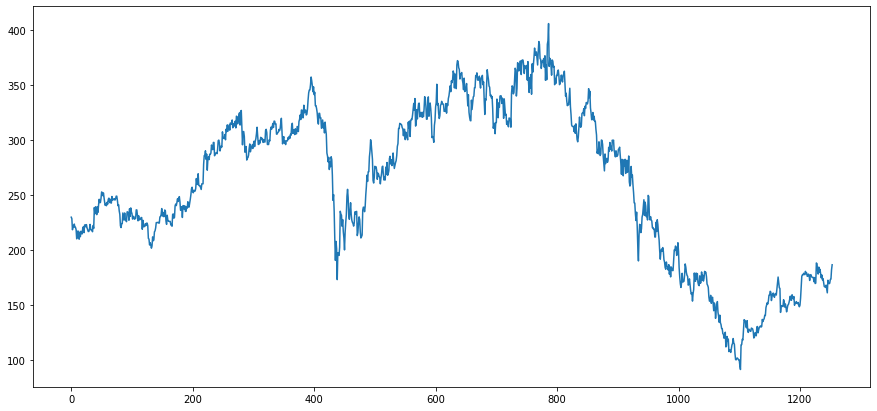

In [11]:
plt.figure(figsize=(15,7))
plt.plot(dataset1)
plt.show()

### Google Company

In [12]:
df1 = pdr.get_data_tiingo('GOOGL', api_key=key)

C:\Users\This Pc\AppData\Local\Temp\ipykernel_11700\1379539222.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df1 = pdr.get_data_tiingo('GOOGL', api_key=key)


In [13]:
df.to_csv("apple_company.csv")

In [14]:
df1.to_csv('google.csv')

In [15]:
import os
os.getcwd()

'C:\\Users\\This Pc\\Desktop\\csv\\TSFA\\CODES'

In [16]:
# fix random seed for reproducibility
tf.random.set_seed(7)

### load the dataset

In [17]:
dataframe = read_csv(r"C:\Users\This Pc\Desktop\csv\TSFA\CODES\apple_company.csv", usecols=[2], engine='python')

In [18]:
dataset = dataframe.values
dataset = dataset.astype('float32')

### plot to show values

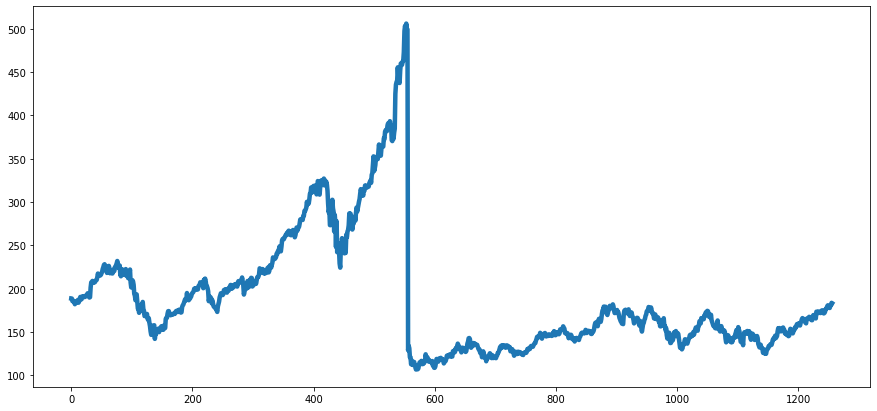

In [19]:
plt.figure(figsize=(15,7))
plt.plot(dataset,linewidth = '4.5')
plt.show()

### normalize the dataset

In [20]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [21]:
dataset

array([[0.20538509],
       [0.20513466],
       [0.19749531],
       ...,
       [0.18564811],
       [0.19273636],
       [0.19153413]], dtype=float32)

### split into train and test sets

In [22]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [23]:
train_size

842

In [24]:
test_size

415

### convert an array of values into a dataset matrix

In [25]:
def create_dataset(dataset, time_step=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-time_step-1):
   a = dataset[i:(i+time_step), 0]
   dataX.append(a)
   dataY.append(dataset[i + time_step, 0])
 return np.array(dataX), np.array(dataY)

### reshape into X=t and Y=t+1

In [26]:
time_step = 1
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [27]:
x_train.shape

(840, 1)

In [28]:
x_test.shape

(413, 1)

### reshape input to be [samples,features,time steps]

In [29]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [30]:
x_train.shape

(840, 1, 1)

In [31]:
x_test.shape

(413, 1, 1)

### create and fit the LSTM model

In [32]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, time_step)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.fit(x_train, y_train, epochs=50,validation_data=(x_test, y_test), batch_size=1, verbose=1)

Epoch 1/50
840/840 [==============================] - 6s 3ms/step - loss: 0.0516 - val_loss: 0.0146
Epoch 2/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0238 - val_loss: 0.0072
Epoch 3/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0073 - val_loss: 5.9373e-04
Epoch 4/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0015 - val_loss: 5.9910e-05
Epoch 5/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 9.6471e-05
Epoch 6/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 5.9338e-05
Epoch 7/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 2.5880e-04
Epoch 8/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 7.2928e-05
Epoch 9/50
840/840 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 6.7656e-05
Epoch 10/50
840/840 [==============================] - 2s 3ms/step - los

### make predictions

In [34]:
train_Predict = model.predict(x_train)
test_Predict = model.predict(x_test)

13/13 [==============================] - 0s 2ms/step


### invert predictions

In [35]:
train_Predict = scaler.inverse_transform(train_Predict)
y_train = scaler.inverse_transform([y_train])
test_Predict = scaler.inverse_transform(test_Predict)
y_test = scaler.inverse_transform([y_test])

### calculate root mean squared error

In [36]:
train_Score = np.sqrt(mean_squared_error(y_train[0], train_Predict[:,0]))
print('Train Score: %.2f RMSE' % (train_Score))
test_Score = np.sqrt(mean_squared_error(y_test[0], test_Predict[:,0]))
print('Test Score: %.2f RMSE' % (test_Score))

Train Score: 13.34 RMSE
Test Score: 3.09 RMSE


### shift train predictions for plotting

In [37]:
train_Predict_Plot = np.empty_like(dataset)
train_Predict_Plot[:, :] = np.nan
train_Predict_Plot[time_step:len(train_Predict)+time_step, :] = train_Predict

### shift test predictions for plotting

In [38]:
test_Predict_Plot = np.empty_like(dataset)
test_Predict_Plot[:, :] = np.nan
test_Predict_Plot[len(train_Predict)+(time_step*2)+1:len(dataset)-1, :] = test_Predict

### plot baseline and predictions

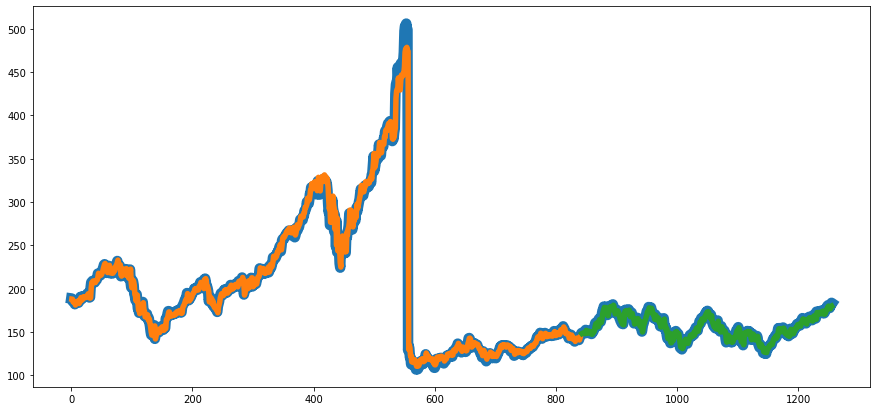

In [39]:
plt.figure(figsize=(15,7))
plt.plot(scaler.inverse_transform(dataset),linewidth = '10.5')
plt.plot(train_Predict_Plot,linewidth = '5.5')
plt.plot(test_Predict_Plot,linewidth = '5.5')
plt.show()